## Knots (Links) in Sage

The presentation is aimed at introducing various constructs used in Knot Theory module in Sage. The main aim is to introduce the following :
    
* Input a Knot/Link Structure
* Differentiate between various Knot/Link structures using various invariants.

-----

### Definitions :
         
To begin with we define `Knot` and `Link` 

<style TYPE="text/css">
code.has-jax {font: inherit; font-size: 100%; background: inherit; border: inherit;}
</style>
<script type="text/x-mathjax-config">
MathJax.Hub.Config({
    tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        skipTags: ['script', 'noscript', 'style', 'textarea', 'pre'] // removed 'code' entry
    }
});
MathJax.Hub.Queue(function() {
    var all = MathJax.Hub.getAllJax(), i;
    for(i = 0; i < all.length; i += 1) {
        all[i].SourceElement().parentNode.className += ' has-jax';
    }
});
</script>
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script>


__**Knot**__: 

A **`knot`** is defined as embedding of the circle $\mathbb{S}^1$ in the 3-dimensional sphere $\mathbb{S}^3$, considered up to ambient isotopy. They represent the physical idea of a knotted rope, but with the particularity that the rope is closed. That is, the ends of the rope are joined.

__**Link**__:


A **`link`** is an embedding of one or more copies of $\mathbb{S}^1$ in $\mathbb{S}^3$, considered up to ambient isotopy. That is, a link represents the idea of one or more tied ropes. **Every knot is a link, but not every link is a knot.**  

-----

### Various representations in Sage

There are different ways to represent a Link. The main representations which Sage understands are the following :

* Braid representation of the Link
* Oriented Gauss Code
* Planar Diagram Code or PD Code

These are internally recognized by Sage, all the user needs to do is input in one of the above representations.

----- 

Let us start by looking at Braid Group (Braidword representation) of the Link.

<style TYPE="text/css">
code.has-jax {font: inherit; font-size: 100%; background: inherit; border: inherit;}
</style>
<script type="text/x-mathjax-config">
MathJax.Hub.Config({
    tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        skipTags: ['script', 'noscript', 'style', 'textarea', 'pre'] // removed 'code' entry
    }
});
MathJax.Hub.Queue(function() {
    var all = MathJax.Hub.getAllJax(), i;
    for(i = 0; i < all.length; i += 1) {
        all[i].SourceElement().parentNode.className += ' has-jax';
    }
});
</script>
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script>

#### Braid group to Braidword representation

Consider a `1 x 1 x 1` cube. On the planes `z = 0` and `z = 1`, at `x = 1/2` consider `n` points varying `y`. Join the `n` points on both the planes, with the rules being : 

* There is a bijective map between the points, implying every point has to be mapped to unique point on the other plane. 
* The points are joined by non intersecting arcs lying completely inside the cube.

For example, see [sage-worksheet](https://cloud.sagemath.com/projects/5ef29c3a-8155-4461-a864-3a030f11b446/files/Knots_Sage/Knots.sagews)

With reference to the above example, there are 3 points on the both the planes and we join them using arcs. 
<pre><code class="python">
# `BraidGroup` is being called with the number of strings
B = BraidGroup(3)
B1 = B([1,2])

</pre>

To define a Braid Group, consider the set $B$, of all braid diagrams as above. Define the composition of the diagrams as stacking them together vertically. 

* Closure is defined as the stacking of diagrams and this diagram is again in the set $B$ 
* Consider three different diagrams, say labelled by $1, 2, 3$, stacking $1$ with $2$ and then with $3$ is same as stacking $2$ with $3$ and stacking the resultant with $1$.
* The identity from the set is the following, label the points on `z = 0` plane by $a, b, c ....$ and `z = 1` plane by $a', b', c' ....$ connect $i$ to corresponding $i'$. The diagram obtained is the identity of the group.
* For every given braid diagram $b$, we can always find a diagram $b'$ in $B$ such that $b \circ b'$ to obtain the identity as mentioned above.

Therefore, the set $B$ forms a group.


###### Generators of group $B$

Now we look at the generators $\sigma_{i}$ of group $B$ which help in understanding the braidword construction. As above consider the points on the plane `z = 0` and `z = 1`, let us label the points on the plane `z = 0` as $P_{i}^{0}$ and on `z = 1` as $P_{i}^{1}$, where $i \in \{1, 2, 3, ...., n\}$. The generators $\sigma_{i}$ of group $B$, are the following braid diagrams : 

Join $P_{i}^{0}$ to $P_{i+1}^{1}$ and $P_{i+1}^{0}$ to $P_{i}^{1}$ and $P_{j}^{0}$ goes to $P_{j}^{1}$, $\forall j \neq i$. If we stare at the generators there are two ways in which we can join, i.e., either the arc joining $P_{i}^{0}$ to $P_{i}^{0}$ to $P_{i+1}^{1}$ is _above_ $P_{i+1}^{0}$ to $P_{i}^{1}$, say $\sigma_{i}$ or the other way round $\sigma_{i}^{-1}$. It is very easy to generate all the diagrams from these generators. Projecting these 3d curves into a 2d planes, gives an insight into **overcrossing** and **undercrossing**, for example [sage-worksheet](https://cloud.sagemath.com/projects/5ef29c3a-8155-4461-a864-3a030f11b446/files/Knots.sagews). For example, the underlying braidword is $1, 2$ for the above diagram indicating that we join $1$ to $2'$ with an over curve and $2$ to $3'$ again with an over curve.

The way a **$Link$** can be constructed from the braidword is by joining the points in the planes `z = 0` and `z = 1` by a curve which lies outside the cube. Therefore, we can construct a Link by closure of the braidword, and so one of the inputs for the Link construct which Sage understands is a braidword.  

In [67]:
B = BraidGroup(3)

In [68]:
# creating a Link out of the braid
L = Link(B([1,1,-2,1]))

In [69]:
L

Link with 1 component represented by 4 crossings

In [70]:
L.is_knot()

True

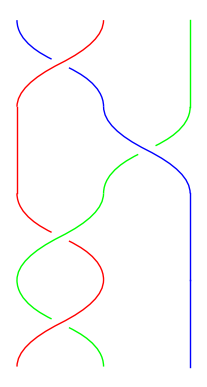

In [71]:
L._braid.plot()

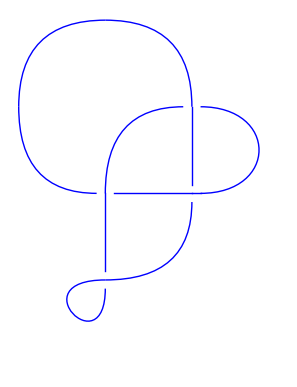

In [72]:
L.plot()

----

#### Oriented Gauss Code, Planar Diagram Code

Though braidword representation looks as a simple technique to study Links, given a Link it is not straight forward to see it as a braid closure and deduce the braidword representation of the Link. We look at two different representations that is the oriented gauss code and planar diagram code. 

###### Oriented Gauss Code :

In order to deduce the oriented gauss code, we will number the crossings along with a sign, that is if it is a _undercrossing_ we would add a **" - "** in the front of the crossing as we move along the Link until we return to the starting point, as well assign a `+1` or `-1` to each of the crossing. Crossings are labelled as `+1` and `-1` using the following notation : 
<img src="files/oriented_gauss_code.png">
For example consider the trefoil which looks as follows : 
<img src="files/trefoil.png">
Using the above rules, the sign at each of the crossing would be -1. The oriented gauss code would be [[[1, -2, 3, -1, 2, -3]],[-1, -1, -1]]

In [73]:
# there are two lists one for the crossings which is a list of lists, the other for the sign of the crossings.
L1 = Link([[[1, -2, 3, -1, 2, -3]],[-1, -1, -1]])

In [74]:
L1

Link with 1 component represented by 3 crossings

Sage also allows intercoversion between different input formats. We can intercovert between braidword, oriented gauss code, planar diagram code. As we have still not defined the planar diagram code let us convert this input to braidword.

In [75]:
L1.braid()

s^-3

In [76]:
L1.braid().Tietze()

(-1, -1, -1)

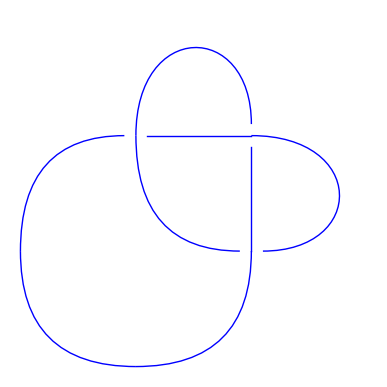

In [77]:
L1.plot()

Lets reverse engineer, let us see if we end up with the same results, starting with the braid and obtaining the oriented gauss code and therefore the same diagram

In [78]:
b1 = L1.braid()

In [79]:
L1_reconstruct = Link(b1)

In [80]:
L1_reconstruct

Link with 1 component represented by 3 crossings

In [81]:
L1_reconstruct.oriented_gauss_code()

[[[-1, 2, -3, 1, -2, 3]], [-1, -1, -1]]

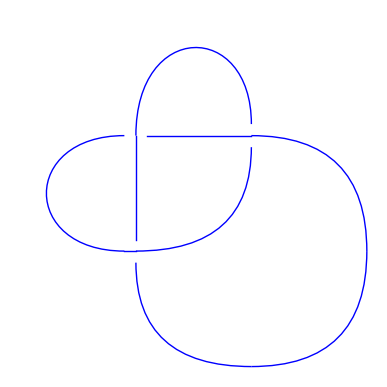

In [82]:
L1_reconstruct.plot()

###### Planar Diagram Code

Finally we introduce the least complicated notation, that is the planar diagram code (pd code). This is constructed in the following way, start with a point on the Link identify this part of the link with a number and keep moving along the Link, once we encounter a crossing just increment the number to the part following the crossing. Once all the parts on the Link are covered, each crossing has 4 numbers associated to it. Each crossing is identified by starting with the undercrossing component and moving in the clockwise direction. For example consider the above trefoil
<img src="files/trefoil_pd.png"> 
The planar diagram code looks as [[4, 2, 5, 1], [2, 6, 3, 5], [6, 4, 1, 3]]

In [83]:
L1_pd = Link([[4, 2, 5, 1], [2, 6, 3, 5], [6, 4, 1, 3]])

In [84]:
L1_pd.oriented_gauss_code()

[[[1, -2, 3, -1, 2, -3]], [-1, -1, -1]]

In [85]:
L1_pd.braid()

s^-3

In [86]:
L1_pd.braid().Tietze()

(-1, -1, -1)

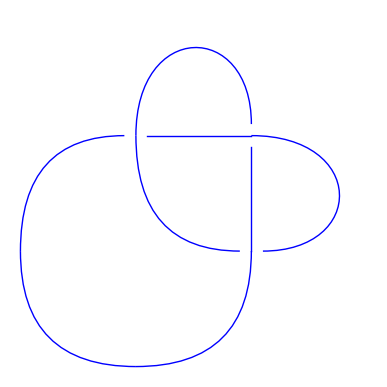

In [87]:
L1_pd.plot()

We also look at `Seifert circles` and `Regions` as these are used in various alogrithms like interconversion between planar diagram code to braidword construction, in construction of jones polynomial.

In [88]:
L1_pd.seifert_circles()

[[1, 5, 3], [2, 6, 4]]

In [89]:
L1_pd.regions()

[[6, 4, 2], [5, -2], [3, -6], [1, -4], [-1, -3, -5]]

Therefore for the trefoil, as expected we get the same braidword representation [-1, -1, -1] whether we start with oriented gauss code or planar diagram code. This leads us to an interesting question, given two Links how can we say whether they are the same or not, it is not always possible to stare at the diagram and conclude whether the links are identical. So we look at other invariants which help in distinguishing various Links/Knots. Before we do that let us examine the above notations for a more general Link.

-----------------

###### Some more examples 

Consider the following link diagrams :
<img src="files/link_ogc.png">,  <img src="files/link_pd.png">

In [90]:
# planar diagram input
L2_pd = Link([[1, 8, 2, 7], [5, 3, 6, 2], [3, 9, 4, 10],[8, 4, 9, 5],[10, 1, 7, 6]])

In [91]:
# oriented gauss code input
L2_ogc = Link([[[-1, 2, -3, 4, -2, 5],[1, -4, 3, -5]],[-1, -1, 1, 1, -1]])

In [92]:
# both are different representations of the same link
L2_pd == L2_ogc

True

In [93]:
# is_knot checks if the link is a knot
L2_pd.is_knot()

False

In [94]:
# the number of distinct components in a link
L2_pd.number_of_components()

2

In [95]:
# valid only for knots, looks at the sign associated with the knot
L2_ogc.is_alternating()

False

In [96]:
# planar diagram to braidword representation 
L2_pd.braid().Tietze()

(1, -2, -2, 1, -2)

In [97]:
# planar diagram to oriented gauss code conversion representation
L2_pd.oriented_gauss_code()

[[[1, -4, 3, -5], [-1, 2, -3, 4, -2, 5]], [-1, -1, 1, 1, -1]]

In [98]:
# oriented gauss code to braidword representation
L2_ogc.braid().Tietze()

(1, -2, -2, 1, -2)

In [99]:
# oriented gauss code to planar diagram representation
L2_ogc.pd_code()

[[1, 8, 2, 7], [5, 3, 6, 2], [3, 9, 4, 10], [8, 4, 9, 5], [10, 1, 7, 6]]

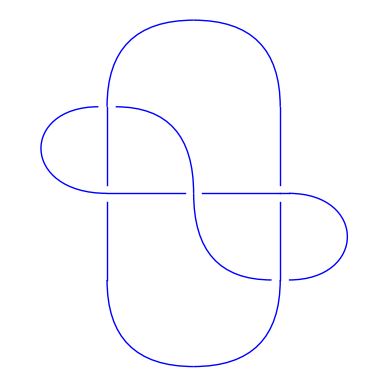

In [100]:
# plotting the planar diagram code
L2_pd.plot()

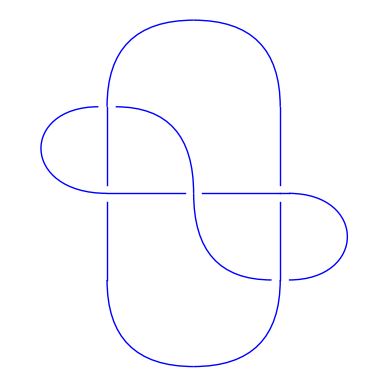

In [101]:
# plotting the oriented gauss code
L2_ogc.plot()

In [102]:
L2_pd.seifert_circles()

[[1, 8, 5, 3, 10], [2, 6, 7], [4, 9]]

In [103]:
L2_pd.regions()

[[10, 1, 8, -4],
 [9, 4],
 [7, -1],
 [6, -10, -3],
 [5, 3, -9],
 [2, -5, -8],
 [-2, -7, -6]]

#### Link Invariants 

We return to the question of how we distinguish various Links given the Link configurations (Planar Diagram Code, Oriented Gauss Code, Braidword representation). Link module allows the computation of the following invariants : 

* Alexander polynomial
* Jones polynomial
* Khovanov Homology 
* HOMFLY polynomial (external library interfacing)

Consider the following versions of trefoils, basically the difference is changing the orientation of the crossings from **-1** at every crossing to **+1**.
<img src="files/trefoils.png">

In [104]:
L_left = Link([[[1, -2, 3, -1, 2, -3]],[-1, -1, -1]])
L_left

Link with 1 component represented by 3 crossings

In [105]:
L_right = Link([[[1, -2, 3, -1, 2, -3]],[1, 1, 1]])
L_right

Link with 1 component represented by 3 crossings

In [106]:
L_left.braid().Tietze()

(-1, -1, -1)

In [107]:
L_right.braid().Tietze()

(1, 1, 1)

In [108]:
L_left.seifert_circles()

[[1, 5, 3], [2, 6, 4]]

In [109]:
L_right.seifert_circles()

[[1, 5, 3], [2, 6, 4]]

In [110]:
L_left.regions()

[[6, 4, 2], [5, -2], [3, -6], [1, -4], [-1, -3, -5]]

In [111]:
L_right.regions()

[[6, -3], [5, 3, 1], [4, -1], [2, -5], [-2, -4, -6]]

In [112]:
L_left.seifert_matrix()

[ 1 -1]
[ 0  1]

In [113]:
L_right.seifert_matrix()

[-1  0]
[ 1 -1]

In [114]:
L_left.determinant(), L_right.determinant()

(3, 3)

In [115]:
L_left.writhe(), L_right.writhe()

(-3, 3)

In [116]:
L_left.alexander_polynomial(), L_right.alexander_polynomial()

(t^-1 - 1 + t, t^-1 - 1 + t)

In [117]:
L_left.jones_polynomial(), L_right.jones_polynomial()

(1/t + 1/t^3 - 1/t^4, -t^4 + t^3 + t)

Consider the following knots `K1` and `K2`given by the following figure: 
<img src="files/K1_K2_named.png">
with reference to the following : http://math.stackexchange.com/questions/1303743/is-there-a-one-to-one-correspondence-between-jones-polynomials-and-knots/1303960

In [118]:
K1 = Knot([[[1, -2, 3, -4, 2, -1, -5, 6, -7, 8, -6, 5, -8, 7, 4, -3]],[1, 1, -1, -1, -1, -1, 1, 1]])
K1

Knot represented by 8 crossings

In [119]:
K2 = Knot([[[1, -2, 3, -4, 5, -6, 7, -8, 4, -1, 2, -3, 8, -5, 6, -7]],[-1, -1, -1, -1, 1, 1, 1, 1]])
K2

Knot represented by 8 crossings

In [120]:
K1 == K2

False

In [121]:
K1.alexander_polynomial()

t^-2 - 6*t^-1 + 11 - 6*t + t^2

In [122]:
K1.jones_polynomial()

t^4 - 2*t^3 + 3*t^2 - 4*t - 4/t + 3/t^2 - 2/t^3 + 1/t^4 + 5

In [123]:
K2.alexander_polynomial()

-t^-3 + 3*t^-2 - 5*t^-1 + 7 - 5*t + 3*t^2 - t^3

In [124]:
K2.jones_polynomial()

t^4 - 2*t^3 + 3*t^2 - 4*t - 4/t + 3/t^2 - 2/t^3 + 1/t^4 + 5

In [125]:
x = var('x')
eqn = (x^-1 - 3 + x)^2
eqn.expand()

x^2 - 6*x - 6/x + 1/x^2 + 11

In [126]:
eqn_j = (x^-2 - x^-1 + 1 - x + x^2)^2
eqn_j.expand()

x^4 - 2*x^3 + 3*x^2 - 4*x - 4/x + 3/x^2 - 2/x^3 + 1/x^4 + 5

In [127]:
K1.arf_invariant()

0

In [128]:
K2.arf_invariant()

0

In [129]:
K1.khovanov_homology()

{-9: {-4: Z},
 -7: {-4: 0, -3: Z x C2, -2: 0},
 -5: {-4: 0, -3: Z, -2: Z x Z x C2, -1: 0, 0: 0},
 -3: {-4: 0, -3: 0, -2: Z, -1: Z x Z x C2 x C2, 0: 0, 1: 0, 2: 0},
 -1: {-4: 0,
  -3: 0,
  -2: 0,
  -1: Z x Z,
  0: Z x Z x Z x C2 x C2,
  1: 0,
  2: 0,
  3: 0,
  4: 0},
 1: {-4: 0,
  -3: 0,
  -2: 0,
  -1: 0,
  0: Z x Z x Z,
  1: Z x Z x C2 x C2,
  2: 0,
  3: 0,
  4: 0},
 3: {-2: 0, -1: 0, 0: 0, 1: Z x Z, 2: Z x C2 x C2, 3: 0, 4: 0},
 5: {0: 0, 1: 0, 2: Z x Z, 3: Z x C2, 4: 0},
 7: {2: 0, 3: Z, 4: C2},
 9: {4: Z}}

In [130]:
K2.khovanov_homology()

{-9: {-4: Z},
 -7: {-4: 0, -3: Z x C2, -2: 0, -1: 0},
 -5: {-4: 0, -3: Z, -2: Z x Z x C2, -1: 0, 0: 0, 1: 0},
 -3: {-4: 0, -3: 0, -2: Z, -1: Z x Z x C2 x C2, 0: 0, 1: 0, 2: 0},
 -1: {-4: 0,
  -3: 0,
  -2: 0,
  -1: Z x Z,
  0: Z x Z x Z x C2 x C2,
  1: 0,
  2: 0,
  3: 0,
  4: 0},
 1: {-4: 0,
  -3: 0,
  -2: 0,
  -1: 0,
  0: Z x Z x Z,
  1: Z x Z x C2 x C2,
  2: 0,
  3: 0,
  4: 0},
 3: {-2: 0, -1: 0, 0: 0, 1: Z x Z, 2: Z x C2 x C2, 3: 0, 4: 0},
 5: {-1: 0, 0: 0, 1: 0, 2: Z x Z, 3: Z x C2, 4: 0},
 7: {1: 0, 2: 0, 3: Z, 4: C2},
 9: {4: Z}}

In [131]:
K1.homfly_polynomial()

L^4 - 2*L^2*M^2 + M^4 + 2*L^2 - 2*M^2 + 3 - 2*L^-2*M^2 + 2*L^-2 + L^-4

In [132]:
L = Link([[1,3,2,4], [6,2,3,1], [7,6,8,5], [4,7,5,10], [9, 14,10, 11], [11, 8, 12, 9], [15, 12, 16, 13], [13, 16, 14, 15]])

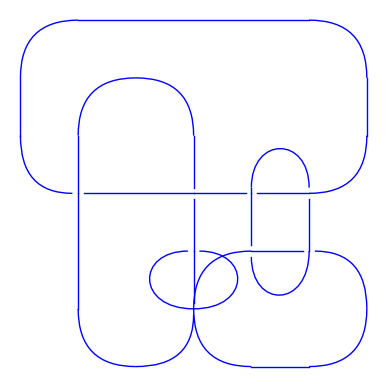

In [133]:
L.plot()

In [134]:
L.khovanov_homology()

{-3: {-2: Z},
 -1: {-2: Z, -1: 0, 0: 0},
 1: {-2: 0, -1: 0, 0: Z x Z x Z x Z, 1: 0, 2: 0},
 3: {-2: 0, -1: 0, 0: Z x Z x Z x Z, 1: 0, 2: 0, 3: 0, 4: 0},
 5: {-2: 0, -1: 0, 0: 0, 1: 0, 2: Z^6, 3: 0, 4: 0, 5: 0, 6: 0},
 7: {-2: 0, -1: 0, 0: 0, 1: 0, 2: Z^6, 3: 0, 4: 0, 5: 0, 6: 0},
 9: {0: 0, 1: 0, 2: 0, 3: 0, 4: Z x Z x Z x Z, 5: 0, 6: 0},
 11: {2: 0, 3: 0, 4: Z x Z x Z x Z, 5: 0, 6: 0},
 13: {4: 0, 5: 0, 6: Z},
 15: {6: Z}}